In [5]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
# svm Classification

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report ,accuracy_score,confusion_matrix

from sklearn.model_selection import train_test_split,cross_val_score

In [8]:
filename='/content/pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe=pd.read_csv(filename,names=names)
array=dataframe.values
x=array[:,0:8]
y=array[:,8]

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3)

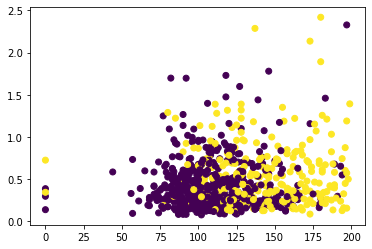

In [12]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['plas'],dataframe['pedi'],c=dataframe['class'])

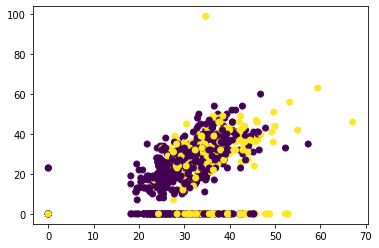

In [13]:
plt.scatter(dataframe['mass'],dataframe['skin'],c=dataframe['class'])

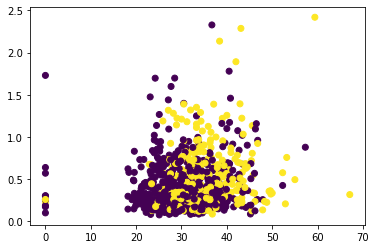

In [14]:
plt.scatter(dataframe['mass'],dataframe['pedi'],c=dataframe['class'])

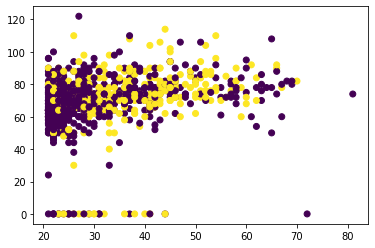

In [15]:
plt.scatter(dataframe['age'],dataframe['pres'],c=dataframe['class'])

In [16]:
clf=SVC(kernel='rbf',gamma=0.0001)
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)
acc=accuracy_score(ytest,y_pred)*100
print('Accuracy=',acc)
confusion_matrix(ytest,y_pred)

Accuracy= 72.72727272727273


array([[127,  19],
       [ 44,  41]])

grid search CV

In [23]:
#to get optimal value of gamma use grid search cv
clf=SVC()
#put ['linear]
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.0001],'C':[1,15,14,13,12,11,10,0.1]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
gsv.best_params_,

({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.7576170510132775)